<a href="https://colab.research.google.com/github/vsnupoudel/CourseAssignment/blob/master/EDA_Ds_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Remember to re-start runtime after installing numpy

In [3]:
!pip install gensim==4.0.0

In [9]:
!pip uninstall --yes numpy
!pip install numpy

Found existing installation: numpy 1.21.2
Uninstalling numpy-1.21.2:
  Successfully uninstalled numpy-1.21.2
  Using cached numpy-1.21.2-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (15.7 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.6.0 requires numpy~=1.19.2, but you have numpy 1.21.2 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


## Loading and preprocessing the data
Direct download from Google Drive. 

In [4]:
!gdown --id 18dan1-qtEG-9NXF1nIw1il79gp77lB9a -O Data.zip

Downloading...
From: https://drive.google.com/uc?id=18dan1-qtEG-9NXF1nIw1il79gp77lB9a
To: /content/Data.zip
4.52MB [00:00, 21.1MB/s]


In [5]:
!unzip -o -q /content/Data.zip -d /content/data/  

In [6]:
INPUTS_DIR = '/content/data/Document_Dataset/inputs' # test set has some images from training, removing them below
TEMPLATES_DIR = '/content/data/Document_Dataset/templates'

In [7]:
import os
os.listdir(INPUTS_DIR)

['document-016-122390.in.000.png',
 'document-006-118355.in.000.png',
 'document-000-114769.out.000.png',
 'document-010-112672.in.000.png',
 'document-002-113892.out.000.png',
 'document-000-100647.out.000.png',
 'document-009-116437.in.000.png',
 'document-000-113660.in.000.png',
 'document-003-123852.in.000.png',
 'document-006-112339.out.000.png',
 'document-010-120946.in.000.png',
 'document-001-113309.out.000.png',
 'document-003-114330.in.000.png',
 'document-011-111771.in.000.png',
 'document-002-113472.in.000.png',
 'document-003-115719.out.000.png',
 'document-018-125441.in.000.png',
 'document-003-119418.out.000.png',
 'document-004-118185.out.000.png',
 'document-005-114610.in.000.png',
 'document-007-111364.out.000.png',
 'document-020-125717.out.000.png',
 'document-002-115633.in.000.png']

In [8]:

for test_file in os.listdir(INPUTS_DIR):
  if test_file in os.listdir(TEMPLATES_DIR):
    os.remove(INPUTS_DIR+'/'+test_file)

In [9]:
 os.listdir(INPUTS_DIR)

['document-016-122390.in.000.png',
 'document-006-118355.in.000.png',
 'document-000-114769.out.000.png',
 'document-010-112672.in.000.png',
 'document-002-113892.out.000.png',
 'document-000-100647.out.000.png',
 'document-009-116437.in.000.png',
 'document-000-113660.in.000.png',
 'document-003-123852.in.000.png',
 'document-006-112339.out.000.png',
 'document-010-120946.in.000.png',
 'document-001-113309.out.000.png',
 'document-003-114330.in.000.png',
 'document-011-111771.in.000.png',
 'document-002-113472.in.000.png',
 'document-003-115719.out.000.png',
 'document-018-125441.in.000.png',
 'document-003-119418.out.000.png',
 'document-004-118185.out.000.png',
 'document-005-114610.in.000.png',
 'document-007-111364.out.000.png',
 'document-020-125717.out.000.png',
 'document-002-115633.in.000.png']

# Will attempt two methods
## Use algorithms that detect similarity of images
1. Crop the heading part of images 
2. Find a pretrained feature vector online on tfhub.dev or other sources.Take
3. Run these pretrained feature vectors on all the templates ( training data) , and store them.
4. Take any input from the input folder ( test set), get its feature vectors.
5. Using distance metric like Euclidean, Manhattan to find which image in template is nearest to the Input

## Use Doc2vec algorithm after extracting text using OCR API.
1. Two documents which have the most similar Doc2Vec embeddings are the same documents

# Trying the second algorithm, as it seems to do a better job from what I know for documents.
## However, if the heading part is always similar, just the first method might be optimal.


## Storing documents' names in a dictionary, leaving their embeddings as None for now

In [10]:
import os
length, filenames  = len( os.listdir(TEMPLATES_DIR) ) , os.listdir(TEMPLATES_DIR) 

In [11]:
template_store = { key: { } for key in  filenames}      
template_store

{'document-000-113188.in.000.png': {},
 'document-000-113660.out.000.png': {},
 'document-000-118454.out.000.png': {},
 'document-000-123542.out.000.png': {},
 'document-001-110866.in.000.png': {},
 'document-001-113309.in.000.png': {},
 'document-001-113760.in.000.png': {},
 'document-001-114898.in.000.png': {},
 'document-001-115484.out.000.png': {},
 'document-001-118758.in.000.png': {},
 'document-001-123663.in.000.png': {},
 'document-002-110935.in.000.png': {},
 'document-002-114195.out.000.png': {},
 'document-003-112107.out.000.png': {},
 'document-004-112180.in.000.png': {},
 'document-004-114466.out.000.png': {},
 'document-004-115864.out.000.png': {},
 'document-005-118279.in.000.png': {},
 'document-006-101162.in.000.png': {},
 'document-006-118355.out.000.png': {}}

## Use OCR API to get text from Images
- Let us explore some of the images first

In [12]:
from PIL import Image  
import numpy as np
img_pil= Image.open(TEMPLATES_DIR+'/document-000-113188.in.000.png') 
import cv2
img_cv = cv2.imread(TEMPLATES_DIR+'/document-000-113188.in.000.png'
        )[: ,: , 0] #images are binary already, so taking the R channel only
img_cv

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [13]:
np.unique( img_cv ), img_cv.shape

(array([  0, 255], dtype=uint8), (3508, 2479))

## Just defining some useful functions

In [14]:
# get grayscale image
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# noise removal
def remove_noise(image):
    return cv2.medianBlur(image,5)
 
#thresholding
def thresholding(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

#dilation
def dilate(image):
    kernel = np.ones((3,3),np.uint8)
    return cv2.dilate(image, kernel, iterations = 1)
    
#erosion
def erode(image):
    kernel = np.ones((3,3),np.uint8)
    return cv2.erode(image, kernel, iterations = 1)

## Plotting with erosion (increases text thickness) and dilation (reduces thickness)

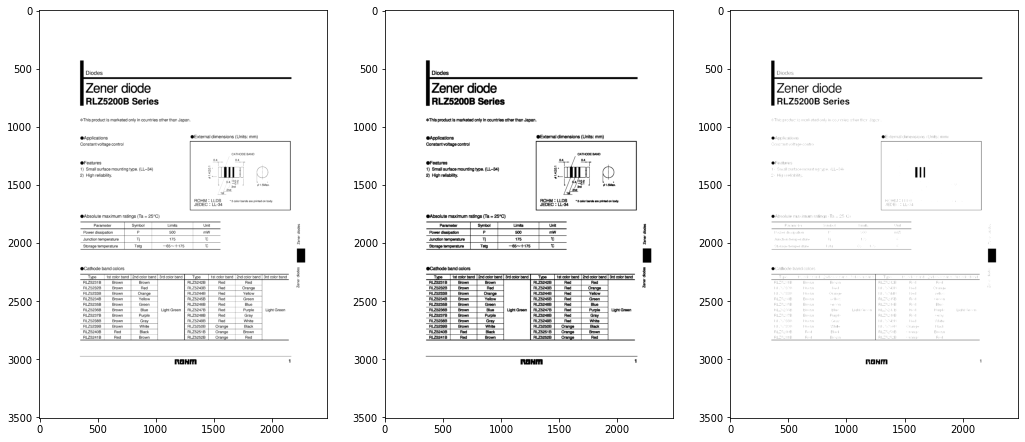

In [15]:
import matplotlib.pyplot as plt
fig, (ax1, ax2, ax3) = plt.subplots(1, 3 
                        , figsize=(img_cv.shape[0]/200, img_cv.shape[1]/200 ))
ax1.imshow( img_cv  ,cmap='gray')
ax2.imshow( erode(img_cv)  ,cmap='gray')
ax3.imshow( dilate(img_cv)  ,cmap='gray')
plt.show()

## Observation:
**The original image looks fine for OCR in this case** 
- Could try eroding with 3,3 filter later

In [16]:
# pip install --upgrade google-cloud-vision

In [17]:
!curl -H "apikey:141a09305188957" --form "file=@document-000-113188.in.000.png" --form "language=eng" --form "isOverlayRequired=true" https://api.ocr.space/Parse/Image

curl: (26) read function returned funny value


## Try with the Python API

In [18]:
import requests
def ocr_space( filename,overlay = True
              ,api_key = '141a09305188957', language = 'eng'):

  payload = {
      'isOverlayRequired' : overlay,
      'apikey': api_key,
      'language': language,
  }

  with open(filename, 'rb') as f:
    r = requests.post('https://api.ocr.space/parse/image',
                      files = {filename : f},
                      data = payload,
                      )
    return r.content.decode()

In [19]:
import json
# json_output = json.loads( ocr_space(TEMPLATES_DIR+'/document-000-113188.in.000.png', overlay= False))
# /content/data/Document_Dataset/templates/document-000-113188.in.000.png

In [21]:
list_of_documents = {}
for k in template_store.keys():
  json_output = json.loads( ocr_space(TEMPLATES_DIR+'/'+k
                    , overlay= False))
  document = json_output['ParsedResults'][0]['ParsedText']
  list_doc = document.split(' ')
  # print(list_doc)
  list_of_documents[k] = list_doc
  # with open( k+'.txt', "w") as text_file:
  #   text_file.write(document)
print(list_of_documents)

{'document-000-118454.out.000.png': ['CLL4729A\r\nTHRU\r\nCLL4764A\r\nI.ow', 'ZENER', 'DIODE\r\n5%', 'TOLERANCE\r\nMELF', 'CASE\r\nABSOLUTE', 'MAXIMUM', 'RATINGS\r\nPower', 'Dissipation\r\nOperating', 'and', 'Storage', 'Temperature\r\nCe', 'nt', 'ral\r\nSemiconductor', 'Corp.\r\nDESCRIPTION:\r\nThe', 'CENTRAL', 'SEMICONDUCTOR', 'CLL4729A\r\nSeries', 'Silicon', 'Zener', 'Diode', 'is', 'a', 'high', 'quality', 'voltage\r\nregulator', 'for', 'use', 'in', 'surface', 'mount', 'industrial,\r\ncommercial,', 'entertainment', 'and', 'computer\r\napplications.\r\nMarking', 'Code:', 'Cathode', 'Band\r\nSYMBOL\r\n-65', 'to', '+200\r\nELECTRICAL', 'CHARACTERISTICS', '(TA=250C),', 'VF=I', '.2MAX', '@', 'IF', '=', '200mA', 'FOR', 'ALL', 'TYPES.\r\nZENER\r\nTEST.\r\nTYPE:', 'NO.\r\nCLL4729A\r\nCLL4730A\r\nCLL4731A\r\nCLL4732A\r\nCLL4733A\r\nCLL4734A\r\nCLL4735A\r\nCLL4736A\r\nCLL4737A\r\nCLL4738A\r\nCLL4739A\r\nCLL4740A\r\nCLL4741A\r\nCLL4742A\r\nCLL4743A\r\nCLL4744A\r\nCLL4745A\r\nCLL4746A\r\nCLL4747A

In [22]:
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

/usr/local/lib/python3.7/dist-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [23]:
!python --version

Python 3.7.11


In [24]:
import gensim
gensim.__version__

'4.0.0'

In [25]:
Doc2Vec()

In [26]:
list_of_documents

{'document-000-113188.in.000.png': ['Diodes\r\nZener',
  'diode\r\nRLZ5200B',
  'Series\r\n*This',
  'product',
  'is',
  'marketed',
  'only',
  'in',
  'countries',
  'other',
  'than',
  'Japan.\r\nROHM',
  ':',
  "LLDS\r\n'Applications\r\nConstant",
  'voltage',
  "control\r\n'Features\r\n1)",
  'Small',
  'surface',
  'mounting',
  'type.',
  "(LL—34)\r\n'External",
  'dimensions',
  '(Units:',
  'mm)\r\n2)',
  'High',
  "reliability.\r\n'Absolute",
  'maximum',
  'ratings',
  '(Ta\r\n0.4\r\n+1\r\nJEDEC',
  ':\r\n1st\r\nCATHODE',
  'BAND\r\n0.4\r\n—0.1\r\n1.5Max.\r\n3rd\r\n2nd\r\n*',
  '3',
  'color',
  'bands',
  'are',
  'printed',
  'on',
  'body.\r\n=',
  '250C)\r\nParameter\r\nPower',
  'dissipation\r\nJunction',
  'temperature\r\nStorage',
  "temperature\r\n'Cathode",
  'band',
  'colors\r\nType\r\n1st',
  'color',
  'band\r\nRLZ5231B\r\nRLZ5232B\r\nRLZ5233B\r\nRLZ5234B\r\nRLZ5235B\r\nRLZ5236B\r\nRLZ5237B\r\nRLZ5238B\r\nRLZ5239B\r\nRLZ5240B\r\nRLZ5241B\r\nBrown\r\nBrown\r\nB

## Generating Tags for each document

In [28]:
tags_dict = {'document-000-118454.out.000.png' : ['Central Semiconductor', 'CLL47', 'Zener', 1]
, 'document-001-110866.in.000.png' : ['Micro Commercial Components', 'BZX2C', 'Zener', 2]
, 'document-005-118279.in.000.png' : ['ROHM', 'UMZ12N' ,'Zener', 0.2]
, 'document-004-115864.out.000.png' : ['SHARP','GL45', 'Light Emitting' , 0.075]
, 'document-001-114898.in.000.png' : ['SHARP','GL360', 'Light Emitting' , 0.04]
, 'document-004-112180.in.000.png' : ['Taiwan SemiConductors','BZT52C','Zener',0.2]
, 'document-006-118355.out.000.png' : ['ROHM','UMZ8.2N','Zener',0.2]
, 'document-004-114466.out.000.png' : ['TSC','1N4448W','Fast Switching Surface Mount',0.35]
, 'document-002-114195.out.000.png' : ['TSC','MMBD7000','Dual Surface Mount Switching', 0.35]
, 'document-000-123542.out.000.png' : ['Diodes Inc.','ZPU1','Zener', 1.3]
, 'document-001-115484.out.000.png' :  ['SHARP','GL1F20','Light Emitting', 0.35]
, 'document-006-101162.in.000.png' :  ['European Patent Application','EP 2 011 730 A1','', None ]
, 'document-001-113760.in.000.png' :  ['Taiwan Semiconductor','BAS70','Schottky Barrier', 0.2]
, 'document-000-113188.in.000.png' :  ['ROHM','RLZ5200B','Zener', 0.5]
, 'document-001-123663.in.000.png' :  ['Diodes Inc.','BZX84C','Zener', 0.2]
, 'document-003-112107.out.000.png' :  [' TSC','AZ23C','Zener', 0.3]
, 'document-001-118758.in.000.png' :  ['Central Semiconductor Corp.','CMSZ52','Zener', 0.25]
, 'document-001-113309.in.000.png' :  ['ROHM','MTZ J','Zener', 0.5]
, 'document-002-110935.in.000.png' :  ['MCC','SMBJ59','Zener', 3.0]
, 'document-000-113660.out.000.png':  ['TSC','RB751V-40','Schottky Barrier', 0.12]
}

In [29]:
list_of_documents.keys()

dict_keys(['document-000-118454.out.000.png', 'document-001-110866.in.000.png', 'document-005-118279.in.000.png', 'document-004-115864.out.000.png', 'document-001-114898.in.000.png', 'document-004-112180.in.000.png', 'document-006-118355.out.000.png', 'document-004-114466.out.000.png', 'document-002-114195.out.000.png', 'document-000-123542.out.000.png', 'document-001-115484.out.000.png', 'document-006-101162.in.000.png', 'document-001-113760.in.000.png', 'document-000-113188.in.000.png', 'document-001-123663.in.000.png', 'document-003-112107.out.000.png', 'document-001-118758.in.000.png', 'document-001-113309.in.000.png', 'document-002-110935.in.000.png', 'document-000-113660.out.000.png'])

In [34]:
for name, corpus in list_of_documents.items():
  if name in tags_dict.keys():
    list_of_documents[name] = [corpus, tags_dict[name] ]

In [35]:
list_of_documents

{'document-000-113188.in.000.png': [['Diodes\r\nZener',
   'diode\r\nRLZ5200B',
   'Series\r\n*This',
   'product',
   'is',
   'marketed',
   'only',
   'in',
   'countries',
   'other',
   'than',
   'Japan.\r\nROHM',
   ':',
   "LLDS\r\n'Applications\r\nConstant",
   'voltage',
   "control\r\n'Features\r\n1)",
   'Small',
   'surface',
   'mounting',
   'type.',
   "(LL—34)\r\n'External",
   'dimensions',
   '(Units:',
   'mm)\r\n2)',
   'High',
   "reliability.\r\n'Absolute",
   'maximum',
   'ratings',
   '(Ta\r\n0.4\r\n+1\r\nJEDEC',
   ':\r\n1st\r\nCATHODE',
   'BAND\r\n0.4\r\n—0.1\r\n1.5Max.\r\n3rd\r\n2nd\r\n*',
   '3',
   'color',
   'bands',
   'are',
   'printed',
   'on',
   'body.\r\n=',
   '250C)\r\nParameter\r\nPower',
   'dissipation\r\nJunction',
   'temperature\r\nStorage',
   "temperature\r\n'Cathode",
   'band',
   'colors\r\nType\r\n1st',
   'color',
   'band\r\nRLZ5231B\r\nRLZ5232B\r\nRLZ5233B\r\nRLZ5234B\r\nRLZ5235B\r\nRLZ5236B\r\nRLZ5237B\r\nRLZ5238B\r\nRLZ5239B\

In [36]:
import os
# txt_list = [ x for x in os.listdir('/content/') if '.txt' in x]
# documents = [ TaggedDocument(doc, [i]) for i, doc in enumerate( txt_list ) ]
# documents
documents = [ TaggedDocument(doc, tags) for doc, tags in  list_of_documents.values()  ]
documents

[TaggedDocument(words=['CLL4729A\r\nTHRU\r\nCLL4764A\r\nI.ow', 'ZENER', 'DIODE\r\n5%', 'TOLERANCE\r\nMELF', 'CASE\r\nABSOLUTE', 'MAXIMUM', 'RATINGS\r\nPower', 'Dissipation\r\nOperating', 'and', 'Storage', 'Temperature\r\nCe', 'nt', 'ral\r\nSemiconductor', 'Corp.\r\nDESCRIPTION:\r\nThe', 'CENTRAL', 'SEMICONDUCTOR', 'CLL4729A\r\nSeries', 'Silicon', 'Zener', 'Diode', 'is', 'a', 'high', 'quality', 'voltage\r\nregulator', 'for', 'use', 'in', 'surface', 'mount', 'industrial,\r\ncommercial,', 'entertainment', 'and', 'computer\r\napplications.\r\nMarking', 'Code:', 'Cathode', 'Band\r\nSYMBOL\r\n-65', 'to', '+200\r\nELECTRICAL', 'CHARACTERISTICS', '(TA=250C),', 'VF=I', '.2MAX', '@', 'IF', '=', '200mA', 'FOR', 'ALL', 'TYPES.\r\nZENER\r\nTEST.\r\nTYPE:', 'NO.\r\nCLL4729A\r\nCLL4730A\r\nCLL4731A\r\nCLL4732A\r\nCLL4733A\r\nCLL4734A\r\nCLL4735A\r\nCLL4736A\r\nCLL4737A\r\nCLL4738A\r\nCLL4739A\r\nCLL4740A\r\nCLL4741A\r\nCLL4742A\r\nCLL4743A\r\nCLL4744A\r\nCLL4745A\r\nCLL4746A\r\nCLL4747A\r\nCLL4748A\r

In [37]:
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [38]:
model = Doc2Vec(documents,
                vector_size=500  # size of output embedding
                 , window = 4    # max continuos words to consider
                , min_count=1    # minimum number of words that are valid
                , workers=4
                , epochs=500)

2021-09-05 17:06:27,031 : INFO : collecting all words and their counts
2021-09-05 17:06:27,034 : INFO : PROGRESS: at example #0, processed 0 words (0/s), 0 word types, 0 tags
2021-09-05 17:06:27,039 : WARNING : More unique tags (49) than documents (20).
2021-09-05 17:06:27,042 : INFO : collected 1278 word types and 52 unique tags from a corpus of 20 examples and 2225 words
2021-09-05 17:06:27,045 : INFO : Creating a fresh vocabulary
2021-09-05 17:06:27,052 : INFO : Doc2Vec lifecycle event {'msg': 'effective_min_count=1 retains 1278 unique words (100.0%% of original 1278, drops 0)', 'datetime': '2021-09-05T17:06:27.052666', 'gensim': '4.0.0', 'python': '3.7.11 (default, Jul  3 2021, 18:01:19) \n[GCC 7.5.0]', 'platform': 'Linux-5.4.104+-x86_64-with-Ubuntu-18.04-bionic', 'event': 'prepare_vocab'}
2021-09-05 17:06:27,055 : INFO : Doc2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 2225 word corpus (100.0%% of original 2225, drops 0)', 'datetime': '2021-09-05T17:06:27.055130', 'ge

In [39]:
model.get_latest_training_loss()

0.0

In [40]:
model.build_vocab(documents)

2021-09-05 17:08:47,437 : INFO : collecting all words and their counts
2021-09-05 17:08:47,441 : INFO : PROGRESS: at example #0, processed 0 words (0/s), 0 word types, 0 tags
2021-09-05 17:08:47,446 : WARNING : More unique tags (49) than documents (20).
2021-09-05 17:08:47,449 : INFO : collected 1278 word types and 52 unique tags from a corpus of 20 examples and 2225 words
2021-09-05 17:08:47,450 : INFO : Creating a fresh vocabulary
2021-09-05 17:08:47,464 : INFO : Doc2Vec lifecycle event {'msg': 'effective_min_count=1 retains 1278 unique words (100.0%% of original 1278, drops 0)', 'datetime': '2021-09-05T17:08:47.464490', 'gensim': '4.0.0', 'python': '3.7.11 (default, Jul  3 2021, 18:01:19) \n[GCC 7.5.0]', 'platform': 'Linux-5.4.104+-x86_64-with-Ubuntu-18.04-bionic', 'event': 'prepare_vocab'}
2021-09-05 17:08:47,465 : INFO : Doc2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 2225 word corpus (100.0%% of original 2225, drops 0)', 'datetime': '2021-09-05T17:08:47.465908', 'ge

In [41]:
model.train(documents,total_examples=model.corpus_count
            , epochs=model.epochs
            )

2021-09-05 17:08:54,499 : WARNING : Effective 'alpha' higher than previous training cycles
2021-09-05 17:08:54,504 : INFO : Doc2Vec lifecycle event {'msg': 'training model with 4 workers on 1278 vocabulary and 500 features, using sg=0 hs=0 sample=0.001 negative=5 window=4', 'datetime': '2021-09-05T17:08:54.504465', 'gensim': '4.0.0', 'python': '3.7.11 (default, Jul  3 2021, 18:01:19) \n[GCC 7.5.0]', 'platform': 'Linux-5.4.104+-x86_64-with-Ubuntu-18.04-bionic', 'event': 'train'}
2021-09-05 17:08:54,518 : INFO : worker thread finished; awaiting finish of 3 more threads
2021-09-05 17:08:54,521 : INFO : worker thread finished; awaiting finish of 2 more threads
2021-09-05 17:08:54,522 : INFO : worker thread finished; awaiting finish of 1 more threads
2021-09-05 17:08:54,532 : INFO : worker thread finished; awaiting finish of 0 more threads
2021-09-05 17:08:54,533 : INFO : EPOCH - 1 : training on 2225 raw words (2116 effective words) took 0.0s, 131970 effective words/s
2021-09-05 17:08:54,54

In [42]:
model.get_latest_training_loss()

0.0

In [43]:
model.save('doc2vec_model_500_5')

2021-09-05 17:09:20,351 : INFO : Doc2Vec lifecycle event {'fname_or_handle': 'doc2vec_model_500_5', 'separately': 'None', 'sep_limit': 10485760, 'ignore': frozenset(), 'datetime': '2021-09-05T17:09:20.351688', 'gensim': '4.0.0', 'python': '3.7.11 (default, Jul  3 2021, 18:01:19) \n[GCC 7.5.0]', 'platform': 'Linux-5.4.104+-x86_64-with-Ubuntu-18.04-bionic', 'event': 'saving'}
2021-09-05 17:09:20,353 : INFO : not storing attribute cum_table
2021-09-05 17:09:20,363 : INFO : saved doc2vec_model_500_5


In [44]:
vectors_train = { doc : model.infer_vector(documents[i][0]).tolist()
 for i, doc in enumerate( list_of_documents.keys() ) }

In [45]:
# import numpy as np
# distances = [ np.linalg.norm(vector-vec) for vec in vectors_train] #L2( Euclidean distance)
# np.argmin(distances)
# this is correct

## Store the document embeddings in corresponding template_store

In [46]:
json_string = json.dumps(vectors_train, indent=4)

In [47]:
# vectors_train
with open('/content/data/vectors_train.json', "w") as outfile: 
    json.dump(vectors_train, outfile)

## Predicting test images

In [50]:
prediction = model.infer_vector(doc_words =  json.loads(   ocr_space(INPUTS_DIR+'/document-000-113660.in.000.png'
                                                      , overlay=False))[
                                                      'ParsedResults'][0][
                                                      'ParsedText'].split(' ') )

In [56]:
sims = model.dv.most_similar([prediction], topn=len(model.dv))
sims

[('TSC', 0.917208194732666),
 ('Schottky Barrier', 0.9135341048240662),
 ('RB751V-40', 0.866855263710022),
 (0.12, 0.8668434619903564),
 ('Zener', 0.7700768709182739),
 ('Light Emitting', 0.7186098694801331),
 ('SHARP', 0.7185861468315125),
 ('EP 2 011 730 A1', 0.6719146966934204),
 (None, 0.6718631386756897),
 ('European Patent Application', 0.6718466877937317),
 ('', 0.6717844605445862),
 (0.04, 0.6007810235023499),
 ('GL360', 0.6007201075553894),
 ('BAS70', 0.5998653173446655),
 ('Taiwan Semiconductor', 0.599825918674469),
 (0.5, 0.5286495685577393),
 ('1N4448W', 0.4694300591945648),
 ('Fast Switching Surface Mount', 0.46938052773475647),
 ('ROHM', 0.3805111050605774),
 (0.35, 0.38013142347335815),
 ('Central Semiconductor Corp.', 0.3789023756980896),
 ('CMSZ52', 0.378797322511673),
 (0.25, 0.37878692150115967),
 ('GL45', 0.37116506695747375),
 (0.075, 0.37101539969444275),
 ('Dual Surface Mount Switching', 0.3558312654495239),
 ('MMBD7000', 0.3557213842868805),
 (0.2, 0.34475213289

In [53]:
dir(model)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__ignoreds',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__numpys',
 '__recursive_saveloads',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__scipys',
 '__setattr__',
 '__sizeof__',
 '__slotnames__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_adapt_by_suffix',
 '_check_corpus_sanity',
 '_check_training_sanity',
 '_clear_post_train',
 '_do_train_epoch',
 '_do_train_job',
 '_get_next_alpha',
 '_get_offsets_and_start_doctags_for_corpusfile',
 '_get_thread_working_mem',
 '_job_producer',
 '_load_specials',
 '_log_epoch_end',
 '_log_epoch_progress',
 '_log_progress',
 '_log_train_end',
 '_raw_word_count',
 '_save_specials',
 '_scan_vocab',
 '_smart_save',
 '_train_epoch',
 '_train_epoch_corpusfile',
 '_worker_loop',
 '_worker_loop_corpusfile',
 'add_lifecycle_even

## Try Sentence Encoder Algorithm